# 划分聚类方法实现与应用
* 划分聚类：通过划分的方式将数据集划分为多个不重叠的子集
* K-Means聚类方法：首先随机初始化K个中心点，然后每一个样本按照距离自身最近的中心点进行聚类，等效于通过两中心点连线的中垂线划分区域。然后根据上次的聚类结果，移动中心点到某个簇的质心位置，将其作为新的中心点，并重复上述过程


In [1]:
# 生成示例数据
'''
data,label = sklearn.datasets.make_blobs(n_samples=100,n_features=2,centers=3,center_box=(-10.0,10.0),random_state=None)   
    n_samples: 表示生成数据总个数,默认为 100 个
    n_features: 表示每一个样本的特征个数，默认为 2 个
    centers: 表示中心点的个数，默认为 3 个
    center_box: 表示每一个中心的边界,默认为 -10.0到10.0
    random_state: 表示生成数据的随机数种子

返回值为：
    data: 表示数据信息
    label: 表示数据类别
'''
from sklearn.datasets import make_blobs

# 构造示例数据
blobs, _ = make_blobs(n_samples=200, centers=3, random_state=18)
blobs[:10]  # 打印出前 10 条数据的信息


array([[ 8.28390539,  4.98011149],
       [ 7.05638504,  7.00948082],
       [ 7.43101466, -6.56941148],
       [ 8.20192526, -6.4442691 ],
       [ 3.15614247,  0.46193832],
       [ 7.7037692 ,  6.14317389],
       [ 5.62705611, -0.35067953],
       [ 7.53828533, -4.86595492],
       [ 8.649291  ,  3.98488194],
       [ 7.91651636,  4.54935348]])

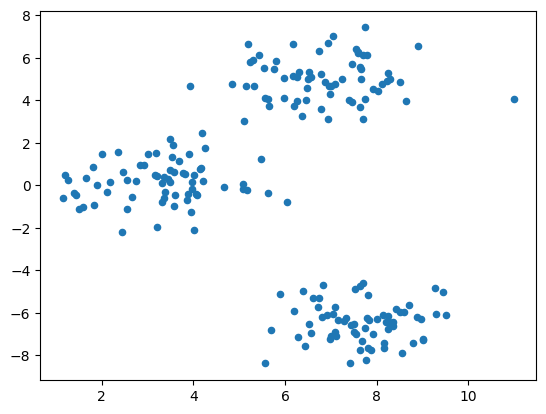

In [2]:
# 可视化
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(blobs[:, 0], blobs[:, 1], s=20)  # 数据展示

In [ ]:
# 随机初始化中心点
# 加入随机数种子以便每一个运行结果相同
import numpy as np

def random_k(k, data):
    """
    参数:
    k -- 中心点个数
    data -- 数据集

    返回:
    init_centers -- 初始化中心点
    """
    # 初始化中心点
    prng = np.random.RandomState(27)  # 定义随机种子
    num_feature = np.shape(data)[1]
    # 初始化从标准正态分布返回的一组随机数，为了更加贴近数据集这里乘了一个 5
    init_centers = prng.randn(k, num_feature) * 5
    return init_centers


init_centers = random_k(3, blobs)

array([[ 6.42802708, -1.51776689],
       [ 3.09537831,  1.97999275],
       [ 1.11702824, -0.27169709]])

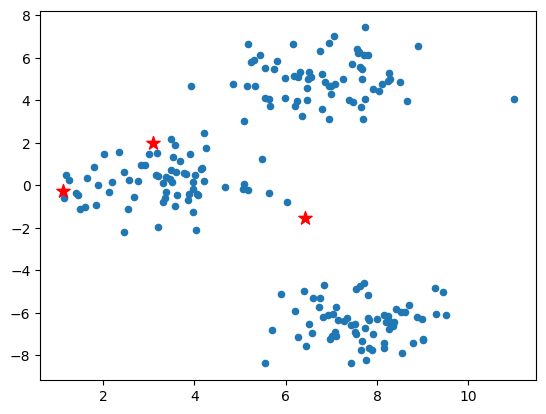

In [4]:
# 将中心点绘制到图中
plt.scatter(blobs[:, 0], blobs[:, 1], s=20)
plt.scatter(init_centers[:, 0], init_centers[:, 1], s=100, marker="*", c="r")

In [5]:
# 计算样本点到中心点的距离
# 可以采用欧氏距离和余弦相似度
def d_euc(x, y):
    """
    参数:
    x -- 数据 a
    y -- 数据 b

    返回:
    d -- 数据 a 和 b 的欧氏距离
    """
    # 计算欧氏距离
    d = np.sqrt(np.sum(np.square(x - y)))
    return d
    

In [6]:
# 最小化SSE，更新聚类中心
# SSE: Sum of squared errors
def update_center(clusters, data, centers):
    """
    参数:
    clusters -- 每一点分好的类别
    data -- 数据集
    centers -- 中心点集合

    返回:
    new_centers -- 新中心点集合
    """
    # 中心点的更新
    num_centers = np.shape(centers)[0]  # 中心点的个数
    num_features = np.shape(centers)[1]  # 每一个中心点的特征数
    container = []

    for x in range(num_centers):
        each_container = []
        container.append(each_container)  # 首先创建一个容器，将相同类别数据存放到一起

    for i, cluster in enumerate(clusters):
        container[cluster].append(data[i])

    new_centers = []
    for i in range(len(container)):
        each_center = np.mean(container[i], axis=0)  # 计算每一子集中数据均值作为中心点
        new_centers.append(each_center)

    return np.vstack(new_centers)  # 使用 np.vstack 将数组垂直堆叠

In [8]:
# K-Means聚类算法实现
# K-Means算法采用的是迭代算法，避开优化 SSE 函数
# 通过不断移动中心点的距离，最终达到聚类的效果
def kmeans_cluster(data, init_centers, k):
    """
    参数:
    data -- 数据集
    init_centers -- 初始化中心点集合
    k -- 中心点个数

    返回:
    centers_container -- 每一次更新中心点的集合
    cluster_container -- 每一次更新类别的集合
    """
    # K-Means 聚类
    max_step = 50  # 定义最大迭代次数，中心点最多移动的次数。
    epsilon = 0.001  # 定义一个足够小的数，通过中心点变化的距离是否小于该数，判断中心点是否变化。

    old_centers = init_centers

    centers_container = []  # 建立一个中心点容器，存放每一次变化后的中心点，以便后面的绘图。
    cluster_container = []  # 建立一个分类容器，存放每一次中心点变化后数据的类别
    centers_container.append(old_centers)

    for step in range(max_step):
        cluster = np.array([], dtype=int)
        for each_data in data:
            distances = np.array([])
            for each_center in old_centers:
                temp_distance = d_euc(each_data, each_center)  # 计算样本和中心点的欧式距离
                distances = np.append(distances, temp_distance)
            lab = np.argmin(distances)  # 返回距离最近中心点的索引，即按照最近中心点分类
            cluster = np.append(cluster, lab)
        cluster_container.append(cluster)

        new_centers = update_center(cluster, data, old_centers)  # 根据子集分类更新中心点

        # 计算每个中心点更新前后之间的欧式距离
        difference = []
        for each_old_center, each_new_center in zip(old_centers, new_centers):
            difference.append(d_euc(each_old_center, each_new_center))

        if (np.array(difference) < epsilon).all():  # 判断每个中心点移动是否均小于 epsilon
            return centers_container, cluster_container

        centers_container.append(new_centers)
        old_centers = new_centers

    return centers_container, cluster_container

# 计算最终中心点
centers_container, cluster_container = kmeans_cluster(blobs, init_centers, 3)
final_center = centers_container[-1]
final_cluster = cluster_container[-1]
final_center

array([[ 7.67007252, -6.44697348],
       [ 6.83832746,  4.98604668],
       [ 3.28477676,  0.15456871]])

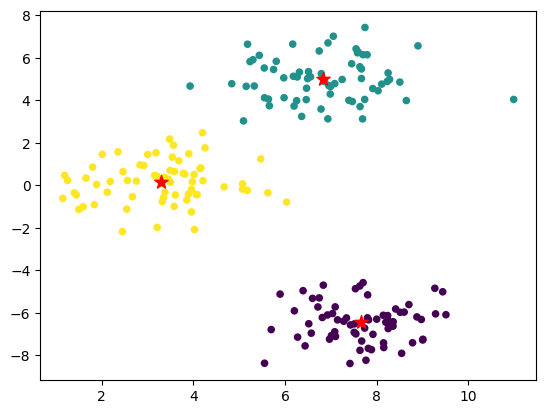

In [11]:
# 可视化展示
plt.scatter(blobs[:, 0], blobs[:, 1], s=20, c=final_cluster)
plt.scatter(final_center[:, 0], final_center[:, 1], s=100, marker="*", c="r")

Text(0.5, 1.0, 'final center')

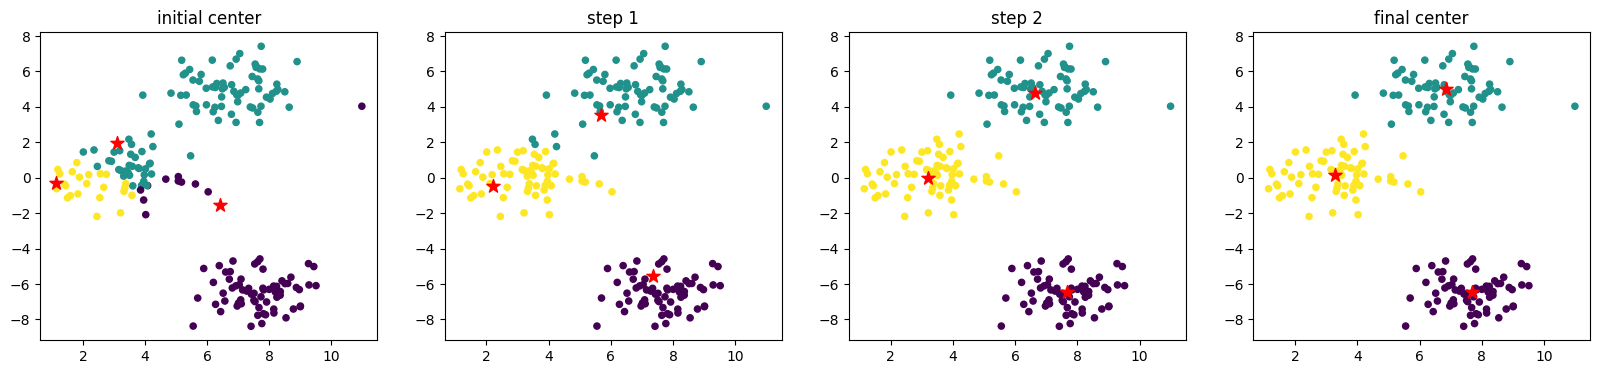

In [12]:
# 尝试将K-Means聚类过程中，中心点移动变化的过程绘制出来
num_axes = len(centers_container)

fig, axes = plt.subplots(1, num_axes, figsize=(20, 4))

axes[0].scatter(blobs[:, 0], blobs[:, 1], s=20, c=cluster_container[0])
axes[0].scatter(init_centers[:, 0], init_centers[:, 1], s=100, marker="*", c="r")
axes[0].set_title("initial center")

for i in range(1, num_axes - 1):
    axes[i].scatter(blobs[:, 0], blobs[:, 1], s=20, c=cluster_container[i])
    axes[i].scatter(
        centers_container[i][:, 0], centers_container[i][:, 1], s=100, marker="*", c="r"
    )
    axes[i].set_title("step {}".format(i))

axes[-1].scatter(blobs[:, 0], blobs[:, 1], s=20, c=cluster_container[-1])
axes[-1].scatter(final_center[:, 0], final_center[:, 1], s=100, marker="*", c="r")
axes[-1].set_title("final center")

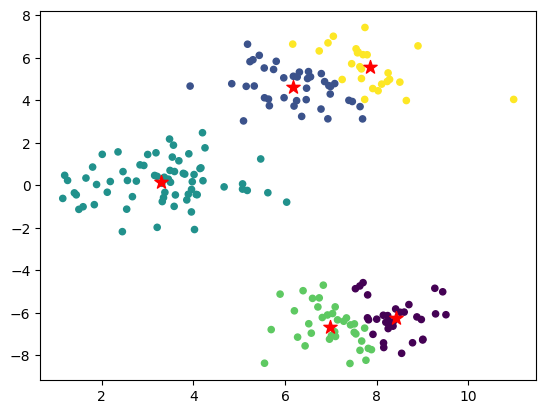

In [13]:
# K-Means算法聚类中的K值选择
# 调用scikit-learn模块中的K-Means算法
'''
sklearn.cluster.k_means(X, n_clusters)
    X: 需要聚类的数据
    n_clusters: 表示聚类的个数，即K值

返回值包括：
    centroid: 表示中心点坐标
    label: 表示聚类后每一个样本的类别
    inertia: 每一个样本与最近中心点距离的平方和，即SSE
'''
# 用 scikit-learn 聚类并绘图
from sklearn.cluster import k_means

model = k_means(blobs, n_clusters=5, n_init="auto")

centers = model[0]
clusters_info = model[1]
plt.scatter(blobs[:, 0], blobs[:, 1], s=20, c=clusters_info)
plt.scatter(centers[:, 0], centers[:, 1], s=100, marker="*", c="r")


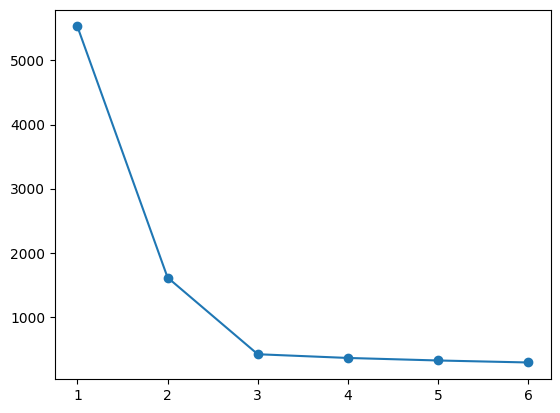

In [ ]:
# 肘部法则：要从数值计算的角度去判断K值的大小
# 随之K值增加，每个类别内部的相似性也随之增加，由此造成的SSE的变化是单调减小的
# 将畸变程度最大的点称为“肘部”
index = []  # 横坐标数组
inertia = []  # 纵坐标数组

# K 从 1~ 6 聚类
for i in range(6):
    model = k_means(blobs, n_clusters=i + 1, n_init="auto")
    index.append(i + 1)
    inertia.append(model[2])

# 绘制折线图
plt.plot(index, inertia, "-o")

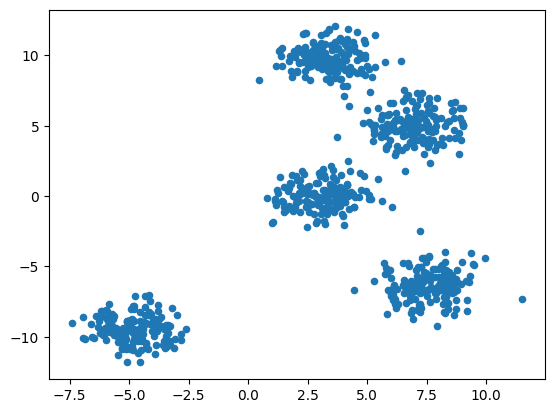

In [15]:
# K-Means++聚类算法
# 解决由于初始化中心点随机，导致的算法陷入局部最优，而非全局最优的问题
blobs_plus, _ = make_blobs(n_samples=800, centers=5, random_state=18)  # 生成数据
plt.scatter(blobs_plus[:, 0], blobs_plus[:, 1], s=20)  # 将数据可视化展示

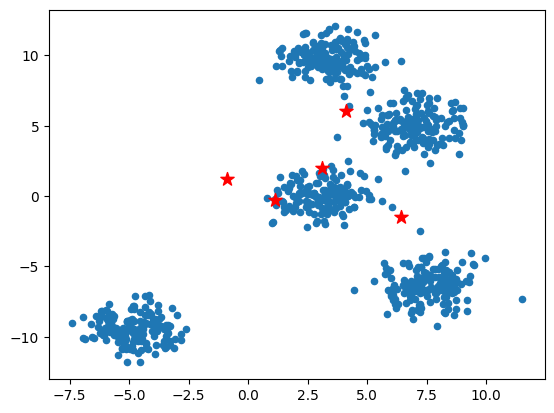

In [16]:
# 随机初始化中心点
km_init_center = random_k(5, blobs_plus)

plt.scatter(blobs_plus[:, 0], blobs_plus[:, 1], s=20)
plt.scatter(km_init_center[:, 0], km_init_center[:, 1], s=100, marker="*", c="r")

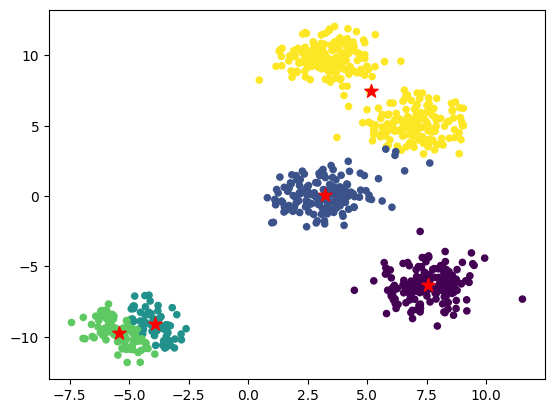

In [19]:
# 使用传统的K-Means算法，将数据进行聚类，聚类数量为5
# 显然此时效果并不理想
km_centers, km_clusters = kmeans_cluster(blobs_plus, km_init_center, 5)
km_final_center = km_centers[-1]
km_final_cluster = km_clusters[-1]
plt.scatter(blobs_plus[:, 0], blobs_plus[:, 1], s=20, c=km_final_cluster)
plt.scatter(km_final_center[:, 0], km_final_center[:, 1], s=100, marker="*", c="r")

K-Means++相较于K-Means在初始化中心点上做了改进
* 在数据集中随机选择一个样本点作为第一个初始化的聚类中心
* 计算样本中的非中心点与最近中心点之间的距离$D(x)$并保存于一个数组里，将数组中的这些距离加起来得到$sum(D(x))$
* 取一个落在$sum(D(x))$范围中的随机值$R$，重复计算$R=R-D(x)$直至得到$R\leq 0$，选取此时的点作为下一个中心点
* 重复 2,3 步骤，直到$K$个聚类中心都被确定
* 对$K$个初始化的聚类中心，利用 K-Means 算法计算最终的聚类中心

**也就是将初始中心点之间的距离拉大了**


In [20]:
# K-Means++算法实现
def get_sum_dis(centers, data):
    """
    参数:
    centers -- 中心点集合
    data -- 数据集

    返回:
    np.sum(dis_container) -- 样本距离最近中心点的距离之和
    dis_container -- 样本距离最近中心点的距离集合
    """

    dis_container = np.array([])
    for each_data in data:
        distances = np.array([])
        for each_center in centers:
            temp_distance = d_euc(each_data, each_center)  # 计算样本和中心点的欧式距离
            distances = np.append(distances, temp_distance)
        lab = np.min(distances)
        dis_container = np.append(dis_container, lab)
    return np.sum(dis_container), dis_container

In [30]:
# 初始化中心点
def get_init_center(data, k):
    """
    参数:
    data -- 数据集
    k -- 中心点个数

    返回:
    np.array(center_container) -- 初始化中心点集合
    """
    # K-Means++ 初始化中心点
    seed = np.random.RandomState()
    p = seed.randint(0, len(data))
    first_center = data[p]

    center_container = []
    center_container.append(first_center)

    for i in range(k - 1):
        sum_dis, dis_con = get_sum_dis(center_container, data)
        r = np.random.randint(0, sum_dis)
        for j in range(len(dis_con)):
            r = r - dis_con[j]
            if r <= 0:
                center_container.append(data[j])
                break
            else:
                pass

    return np.array(center_container)

In [33]:
# 得到初始化中心点的坐标
plus_init_center = get_init_center(blobs_plus, 5)
plus_init_center

array([[ 3.43858264,  0.17344925],
       [ 3.92796314, 11.0072491 ],
       [ 7.09338543,  6.50017553],
       [-4.80892232, -9.46768484],
       [ 6.50175152, -6.31390266]])

Text(0.5, 1.0, 'final center')

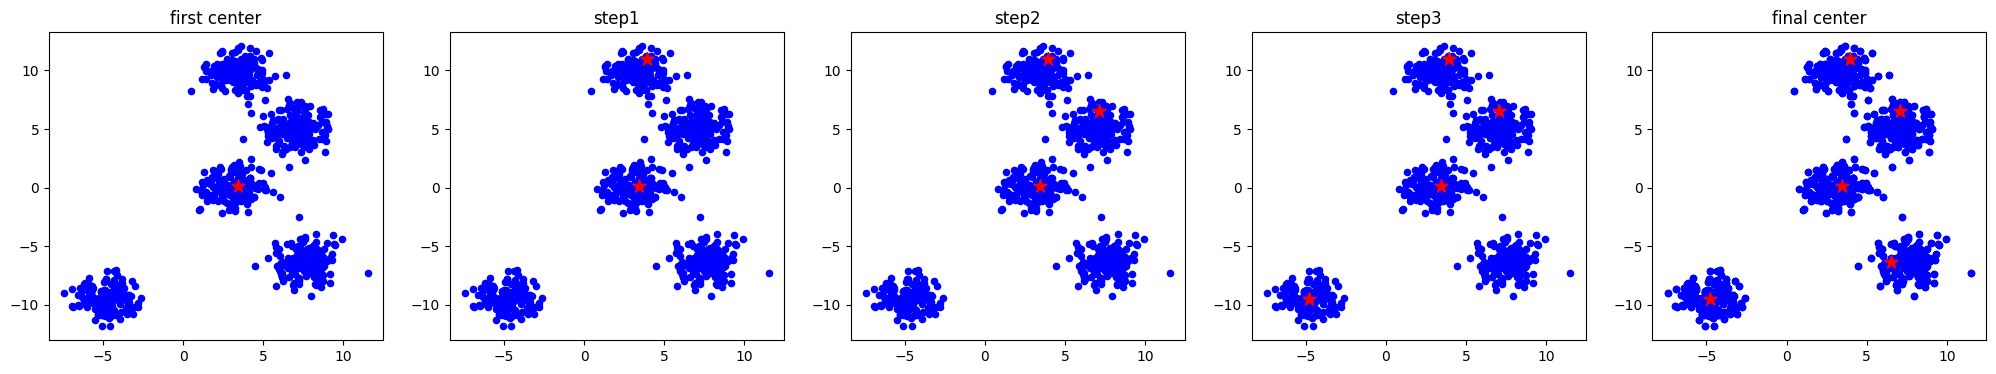

In [34]:
# 可视化寻找中心点的过程
num = len(plus_init_center)

fig, axes = plt.subplots(1, num, figsize=(25, 4))

axes[0].scatter(blobs_plus[:, 0], blobs_plus[:, 1], s=20, c="b")
axes[0].scatter(
    plus_init_center[0, 0], plus_init_center[0, 1], s=100, marker="*", c="r"
)
axes[0].set_title("first center")

for i in range(1, num):
    axes[i].scatter(blobs_plus[:, 0], blobs_plus[:, 1], s=20, c="b")
    axes[i].scatter(
        plus_init_center[: i + 1, 0],
        plus_init_center[: i + 1, 1],
        s=100,
        marker="*",
        c="r",
    )
    axes[i].set_title("step{}".format(i))

axes[-1].scatter(blobs_plus[:, 0], blobs_plus[:, 1], s=20, c="b")
axes[-1].scatter(
    plus_init_center[:, 0], plus_init_center[:, 1], s=100, marker="*", c="r"
)
axes[-1].set_title("final center")

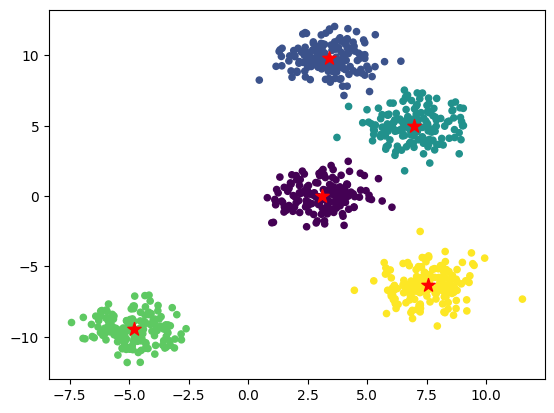

In [35]:
# 使用K-Means再次进行聚类
plus_centers, plus_clusters = kmeans_cluster(blobs_plus, plus_init_center, 5)
plus_final_center = plus_centers[-1]
plus_final_cluster = plus_clusters[-1]

plt.scatter(blobs_plus[:, 0], blobs_plus[:, 1], s=20, c=plus_final_cluster)
plt.scatter(plus_final_center[:, 0], plus_final_center[:, 1], s=100, marker="*", c="r")

Text(0.5, 1.0, 'Mini Batch K-Means')

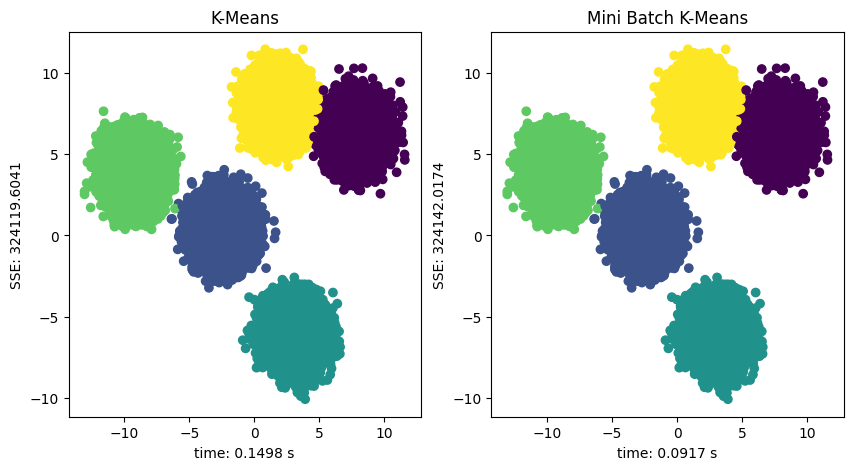

In [37]:
# Mini-Batch K-Means聚类算法，用于解决大规模数据的聚类问题
# 在每一次迭代过程中，从数据集中随机抽取一部分数据形成小批量数据集
# 用该部分数据集进行距离计算和中心点的更新
# 由于每一次都是随机抽取，所以每一次抽取的数据能很好的表现原本数据集的特性
import time
from sklearn.cluster import MiniBatchKMeans, KMeans


test_data, _ = make_blobs(
    200000, n_features=2, cluster_std=0.9, centers=5, random_state=20
)

km = KMeans(n_clusters=5, n_init="auto")
mini_km = MiniBatchKMeans(n_clusters=5, n_init="auto")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

for i, model in enumerate([km, mini_km]):
    t0 = time.time()
    model.fit(test_data)
    t1 = time.time()
    t = t1 - t0
    sse = model.inertia_
    axes[i].scatter(test_data[:, 0], test_data[:, 1], c=model.labels_)
    axes[i].set_xlabel("time: {:.4f} s".format(t))
    axes[i].set_ylabel("SSE: {:.4f}".format(sse))

axes[0].set_title("K-Means")
axes[1].set_title("Mini Batch K-Means")